# Flights data exploration
## by Jean-Luc COSSI

## Preliminary Wrangling

I use Python visualization libraries to systematically explore "Reporting Carrier On-Time Performance" for several years. Those data files have been selected from http://stat-computing.org/dataexpo/2009/the-data.html.  
A detailed presentation of the data is available here https://www.transtats.bts.gov/Fields.asp?Table_ID=236

In [83]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime, time

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

As the original files were too big, I created a random sample of the original files I chose to use.

Load in the dataset and describe its properties. I motivate my exploration goals through this section.

In [84]:
# load data files
df_1987 = pd.read_csv('data/1988_sample.csv')
df_1989 = pd.read_csv('data/1989_sample.csv')
df_1990 = pd.read_csv('data/1990_sample.csv')
df_1991 = pd.read_csv('data/1991_sample.csv')
df_1992 = pd.read_csv('data/1992_sample.csv')

# contains the association between airport real names and their IATA code
# collected from https://www.codediesel.com/data/international-airport-codes-download/
df_code = pd.read_csv('data/airport-codes.csv', names=['airport', 'Dest'])

In [85]:
# concat all into one dafaframe
df = pd.concat([df_1987, df_1989, df_1990, df_1991, df_1992], ignore_index=True)

In [86]:
# Get the dataframe size
df.shape

(75000, 29)

In [87]:
# Get a view on some values
df.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
65772,1992,4,3,5,1040.0,1040,1123.0,1127,TW,425,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
57803,1991,1,1,2,741.0,740,828.0,835,DL,1902,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
74121,1992,12,15,2,1906.0,1910,2050.0,2055,NW,1529,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
24000,1989,8,25,5,1154.0,1155,1259.0,1302,AA,809,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
41267,1990,3,17,6,1002.0,955,1111.0,1101,US,253,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Observation: there are missing data in some columns.

In [88]:
# Get the columns types
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode     float64
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [89]:
# Where are the missing data ?
df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                833
CRSDepTime               0
ArrTime               1015
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum              75000
ActualElapsedTime     1015
CRSElapsedTime           0
AirTime              75000
ArrDelay              1015
DepDelay               833
Origin                   0
Dest                     0
Distance               443
TaxiIn               75000
TaxiOut              75000
Cancelled                0
CancellationCode     75000
Diverted                 0
CarrierDelay         75000
WeatherDelay         75000
NASDelay             75000
SecurityDelay        75000
LateAircraftDelay    75000
dtype: int64

In [90]:
# Make a copy of the original dataframe
df_flights = df.copy()

In [91]:
# Drop the columns where all elements are missing
df_flights.drop('TailNum', axis=1, inplace=True)
df_flights.drop('AirTime', axis=1, inplace=True)
df_flights.drop('TaxiIn', axis=1, inplace=True)
df_flights.drop('TaxiOut', axis=1, inplace=True)
df_flights.drop('CancellationCode', axis=1, inplace=True)
df_flights.drop('CarrierDelay', axis=1, inplace=True)
df_flights.drop('WeatherDelay', axis=1, inplace=True)
df_flights.drop('NASDelay', axis=1, inplace=True)
df_flights.drop('SecurityDelay', axis=1, inplace=True)
df_flights.drop('LateAircraftDelay', axis=1, inplace=True)

In [92]:
# Where are the missing data ?
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime               833
CRSDepTime              0
ArrTime              1015
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
ActualElapsedTime    1015
CRSElapsedTime          0
ArrDelay             1015
DepDelay              833
Origin                  0
Dest                    0
Distance              443
Cancelled               0
Diverted                0
dtype: int64

In [93]:
# an idea on the size now
df_flights.shape

(75000, 19)

In [94]:
# Check the result
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime               833
CRSDepTime              0
ArrTime              1015
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
ActualElapsedTime    1015
CRSElapsedTime          0
ArrDelay             1015
DepDelay              833
Origin                  0
Dest                    0
Distance              443
Cancelled               0
Diverted                0
dtype: int64

In [95]:
# create airline names-IATA codes dictionnary for the ones we need and know
airlines_dict = {'AA': 'American Airlines', 'UA': 'United Airlines', 'EA': 'Eastern', 'US': 'US Airways', 
                 'CO': 'Cobalt Air', 'NW': 'Northwest Airlines', 'TW': 'Tway Air', 'PI': 'Polar Airlines',
                'HP': 'Direktflyg', 'WN': 'Southwest Airlines', 'AS': 'Alaska Airlines', 'PS': 'Ukraine Airlines',
                'PA (1)': 'airblue', 'ML': 'Air Micronesia', 'ML (1)': 'Air Micronesia', 'PA': 'airblue',
                'DL': 'Delta Airlines'}

In [96]:
# Set carriers names according to the dictionnary
def set_carriername(row):
    if (row['UniqueCarrier'] in airlines_dict):
        return (airlines_dict.get(row['UniqueCarrier']))
    return

In [97]:
# set carriers names using the function above
df_flights['UniqueCarrier'] = df_flights.apply(set_carriername, axis=1)

In [98]:
# Test: which are the uniques values do we have now ?
df_flights['UniqueCarrier'].unique()

array(['United Airlines', 'American Airlines', 'Tway Air',
       'Delta Airlines', 'Eastern', 'Cobalt Air', 'US Airways',
       'Polar Airlines', 'Northwest Airlines', 'Southwest Airlines',
       'Direktflyg', 'airblue', 'Ukraine Airlines', 'Alaska Airlines',
       'Air Micronesia'], dtype=object)

In [99]:
# Destination airports names : do we have duplicates ?
sum(df_code.Dest.duplicated())

87

In [100]:
# drop duplicates based on the code
df_code.drop_duplicates(subset='Dest', inplace=True)

In [101]:
# Merge the airports' names with df_flights
# the new column 'airport' contains the names of the destinations airports
df_flights = pd.merge(df_flights, df_code, on='Dest')

In [102]:
# Set the "Cancelled" column type to boolean
df_flights['Cancelled'] = df_flights['Cancelled'].astype('bool')

In [103]:
# How many cancelled flights do we have ?
df_flights.query('Cancelled').isnull().sum()

Year                   0
Month                  0
DayofMonth             0
DayOfWeek              0
DepTime              831
CRSDepTime             0
ArrTime              831
CRSArrTime             0
UniqueCarrier          0
FlightNum              0
ActualElapsedTime    831
CRSElapsedTime         0
ArrDelay             831
DepDelay             831
Origin                 0
Dest                   0
Distance               3
Cancelled              0
Diverted               0
airport                0
dtype: int64

So the cancelled flight might be the ones with NaN as `DepTime`, which makes sens. So I keep the remaining lines with NaN.

In [104]:
# Set the "Year", "Month" and "DayOfMonth" to datetime
# Rename the needed columns for the datetime conversion
df_flights = df_flights.rename(columns={'Year': 'year', 'Month': 'month', 'DayofMonth': 'day'})

# Create a new column as the datetime
df_flights['timestamp'] = pd.to_datetime(df_flights[['year', 'month', 'day']])

In [105]:
# Drop the previous year, month, day columns we don't need anymore
df_flights.drop('year', axis=1, inplace=True)
df_flights.drop('month', axis=1, inplace=True)
df_flights.drop('day', axis=1, inplace=True)

In [106]:
# View samples
df_flights.sample(5)

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,airport,timestamp
73613,6,1334.0,1321,1412.0,1406,Polar Airlines,370,38.0,45,6.0,13.0,CLT,AGS,140.0,False,0,"Augusta, GA",1988-03-26
9314,5,1336.0,1325,1533.0,1525,US Airways,74,57.0,60,8.0,11.0,IND,CLE,261.0,False,0,"Cleveland, OH",1990-10-26
52914,1,1556.0,1556,1655.0,1652,Direktflyg,477,59.0,56,3.0,0.0,LAS,BUR,223.0,False,0,"Burbank, CA",1990-06-25
67865,2,945.0,945,1221.0,1226,US Airways,225,156.0,161,-5.0,0.0,PHL,FLL,992.0,False,0,"Fort Lauderdale, FL",1991-08-06
29552,5,729.0,730,830.0,839,US Airways,697,61.0,69,-9.0,-1.0,PHL,PIT,267.0,False,0,"Pittsburgh, PA",1990-12-07


In [107]:
# Statistics summary
df_flights.describe()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Distance,Diverted
count,74897.000000,74066.000000,74897.000000,73885.000000,74897.000000,74897.000000,73885.000000,74897.000000,73885.000000,74066.000000,74454.000000,74897.000000
mean,3.936326,1356.282613,1349.178418,1495.651120,1496.217058,764.627902,109.578345,109.745023,6.425865,6.711271,633.353681,0.002417
std,1.993860,476.454511,470.600015,493.995435,483.037586,549.042900,64.542495,64.212019,23.430960,20.952689,520.385516,0.049100
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,15.000000,-65.000000,-51.000000,11.000000,0.000000
25%,2.000000,936.000000,930.000000,1118.000000,1118.000000,336.000000,64.000000,65.000000,-5.000000,0.000000,270.000000,0.000000
50%,4.000000,1337.000000,1330.000000,1522.000000,1521.000000,651.000000,90.000000,90.000000,1.000000,0.000000,459.000000,0.000000
75%,6.000000,1744.000000,1735.000000,1920.000000,1915.000000,1097.000000,139.000000,139.000000,11.000000,5.000000,861.000000,0.000000
max,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,3362.000000,625.000000,625.000000,583.000000,1425.000000,4983.000000,1.000000


### What is the structure of your dataset?

There are 73546 records of flights, over 5 years. There are time variables (mainly expected times and delays), numeric variables and text variables such are origins, destinations and carriers' names. We also have boolean like information (here as 0 or 1) to know if the flight is canceled or diverted.


### What is/are the main feature(s) of interest in your dataset?

I am most interested to see if there are certain destinations or arrival cities that are home to more delays or cancellations ? and potentially why ?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will start, looking into `Cancelled` which indicates if the flight has been canceled or not. Then I will explore the destinations `Dest` and the carrier here as `UniqueCarrier` as well as the arrival delay `ArrDelay`.   
Regarding the features relationships, I will dive into cancelled and delayed flights relationships with the carrier and the arrival cities.    
For the multivariate exploration, I will add the planned flight duration `CSRElapsedTime` and departure delays `DepDelay` to support my investigations respectively on the cancelled fligths and on the delayed ones. 

## Univariate Exploration

In this section, I investigate distributions of the individual variables.

Looking at the `Canceled` variable. 

In [108]:
# Get the number of cancelled
cancelled = df_flights.query('Cancelled == True')['Cancelled'].count()
non_cancelled = df_flights.shape[0] - cancelled

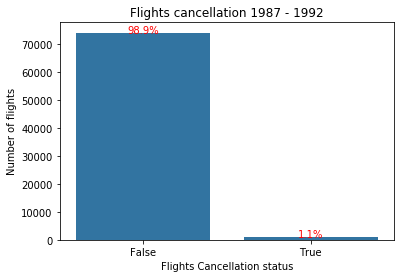

In [109]:
# Create a bar chart of the cancelation state
# Use only one color
base_color = sb.color_palette()[0]

# plot the bar chart
cancelled_bar = sb.countplot(data = df_flights, x = 'Cancelled', color = base_color)

# Set labels names
cancelled_bar.set(title='Flights cancellation 1987 - 1992', xlabel='Flights Cancellation status', ylabel='Number of flights')

# label the frequencies on the bars
# First, calculate non cancelled percentage
non_cancelled_percent = '{:0.1f}%'.format(100*non_cancelled/df_flights.shape[0])

# calculate the cancelled percentage
cancelled_percent = '{:0.1f}%'.format(100*cancelled/df_flights.shape[0])

# Set the labels names on the bars
plt.text(0, non_cancelled-8, non_cancelled_percent, ha = 'center', color = 'r')
plt.text(1, cancelled-8, cancelled_percent, ha = 'center', color = 'r');

Now I observe the arrival cities for which flights are cancelled. This is the `Dest` variable.

In [110]:
# Get the cancelled flight dataframe
df_cancelled = df_flights[df_flights['Cancelled'] == True]

I want to have a view on the occurences of the cancellation for each arrival city. So I use seaborn function `countplot()` with the `Dest`column from the dataframe.

In [111]:
# Get the top 7 and 5 cities with the most cancellations
first_5_cities = df_cancelled.airport.value_counts().head(5).keys().tolist()
first_7_cities = df_cancelled.airport.value_counts().head(7).keys().tolist()

In [112]:
# restrict the plot to those cities for a better analysis
# this is a specific dataframe for the plot
df_cancelled_cities = df_cancelled.query('airport in @first_7_cities')

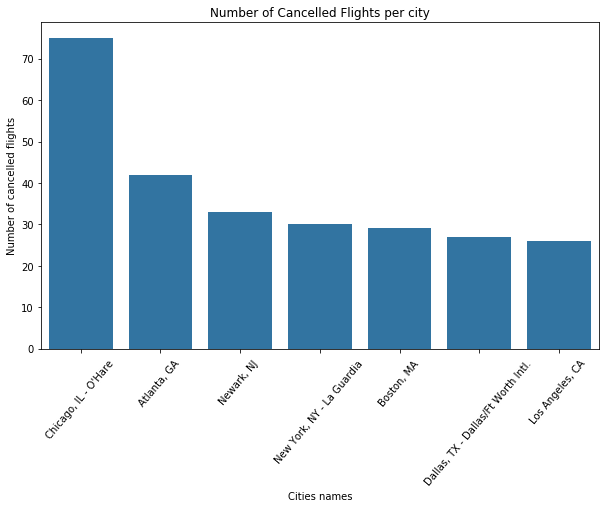

In [113]:
# Set the size bigger
plt.figure(figsize = [10, 6])

# Use only one single color
base_color = color = sb.color_palette()[0]

# sort
cat_order = df_cancelled_cities['airport'].value_counts().index

# plot the bar chart
cancelled_cities_plot = sb.countplot(data = df_cancelled_cities, x = 'airport', color = base_color, order = cat_order)

# set the titles
cancelled_cities_plot.set(title='Number of Cancelled Flights per city', xlabel='Cities names', ylabel='Number of cancelled flights')

# rotate the labels
cancelled_cities_plot.set_xticklabels(cancelled_cities_plot.get_xticklabels(), rotation=50);

I plotted along the y parameter because of the huge number of cities I have in the dataframe.  
ORD city, which is "Chicago-O´Hare" is the most cancelled flight.  
The city name mapping with the IATA code is from https://en.wikipedia.org/wiki/List_of_airports_in_the_United_States

Digging into this a little bit further, flight cancellation could be linked to technical issues, I mean the carrier. So let's try to see if we have one or two carriers the most associated to the cancellations.   
Observation of the `UniqueCarrier` variable.

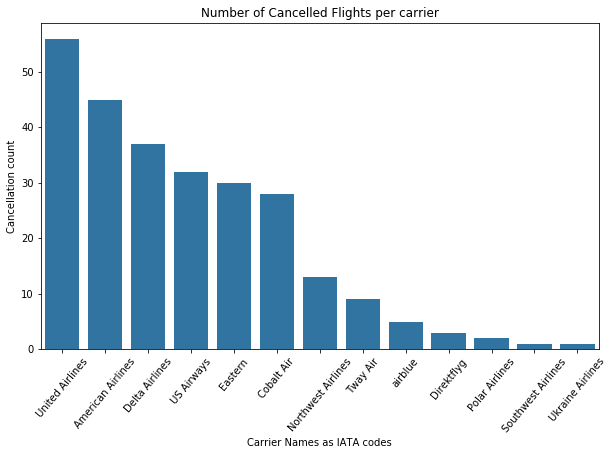

In [114]:
# Set the size bigger
plt.figure(figsize = [10, 6])

# Use only one single color
base_color = color = sb.color_palette()[0]

# sort
cat_order = df_cancelled_cities['UniqueCarrier'].value_counts().index

# plot the bar chart
cancelled_carrier_plot = sb.countplot(data = df_cancelled_cities, x = 'UniqueCarrier', color = base_color, order = cat_order)

# set titles
cancelled_carrier_plot.set(title='Number of Cancelled Flights per carrier', xlabel='Carrier Names as IATA codes', ylabel='Cancellation count')

# rotate the labels on x axis
cancelled_carrier_plot.set_xticklabels(cancelled_carrier_plot.get_xticklabels(), rotation=50);

The winner is US which is "US Airways".

Carriers used to be associated with cities. So I will be interesting the bivariate exploration part, to see the relationship between carriers and destinations cities, for the cancelled flights. 

Now, let's observe the `ArrDelay` variable.   
For coherency, I need to use a dataframe with all the cancelled flights removed. 

In [115]:
# Get a copy of the dataframe we started to clean
df_completed_flights = df_flights.copy()

In [116]:
# Now we delete the rows where at least one element is missing
df_completed_flights.dropna(inplace=True)

Now I can plot `ArrDelay`

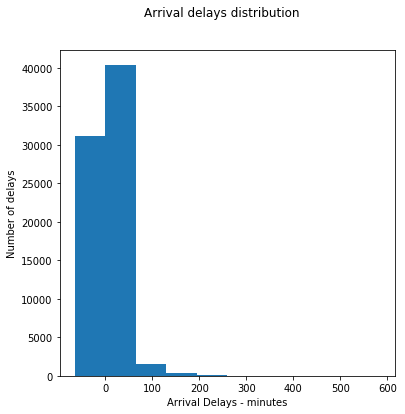

In [117]:
# basic plot for Arrival delay distribution
fig = plt.figure(figsize = [6, 6])

# set the title
fig.suptitle('Arrival delays distribution', fontsize=12)

# plot the distribution
plt.hist(data = df_completed_flights, x = 'ArrDelay')

# Set the labels
plt.xlabel('Arrival Delays - minutes')
plt.ylabel('Number of delays');

The graph is right skewed.  
I need to find a more appropriate bin. So let's have a look on the default bin-selection used by seaborn `displot` for this case. 

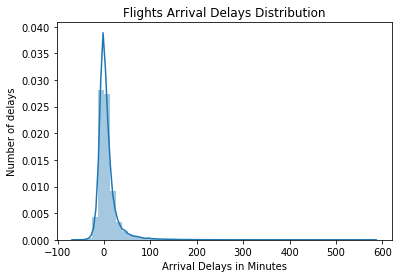

In [118]:
# Plot the arrival delays
arrdelay_plot = sb.distplot(df_completed_flights['ArrDelay'])

# Set labels names
arrdelay_plot.set(title='Flights Arrival Delays Distribution', xlabel='Arrival Delays in Minutes', ylabel='Number of delays');

From the statistic summary above, I know that even if the max delay is 583 minutes, the majority of the values should be around zero, with a min value of -65 minutes.  
So let's explore any possibility to have a more adapted bin selection, so I can have a better view on the values around zero.

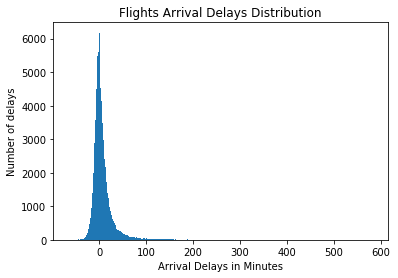

In [119]:
# tentative for a better bin selection
# start the range at the min() as observed from the summary statistics
bin_edges = np.arange(df_completed_flights['ArrDelay'].min(), df_completed_flights['ArrDelay'].max()+2, 2)

# plot the histogram with the bins
arrdelay_plot = sb.distplot(df_completed_flights['ArrDelay'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})

# set labels
arrdelay_plot.set(title='Flights Arrival Delays Distribution', xlabel='Arrival Delays in Minutes', ylabel='Number of delays');

I've plotted using bin width form 0.6 to 15 and finally found out that the default bin-selection from seaborn `displot` offers more readability in this situation. So I choose 2 as bin width.

My original point was that it is right skewed. So let's zoom on the main bulk of the data throught the use of axis limits.

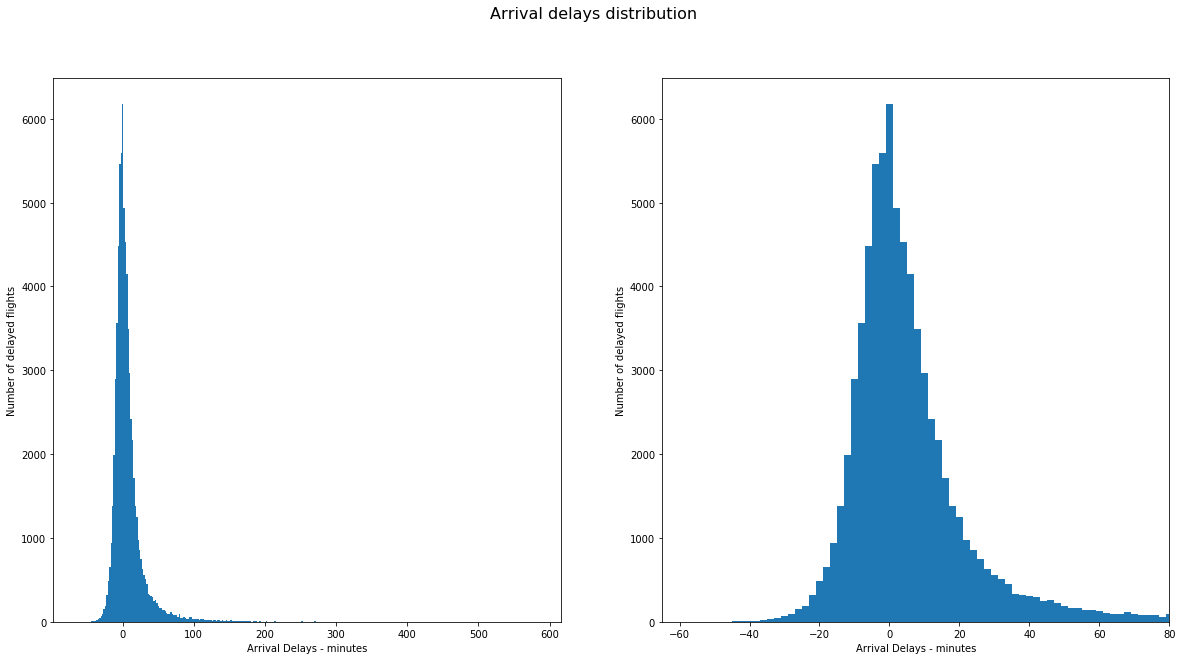

In [120]:
# tentative for a better zoom selection
# set the figures sizes
fig = plt.figure(figsize = [20, 10])

# set the title
fig.suptitle('Arrival delays distribution', fontsize=16)

# plot the full data with the bin width I found adapted
plt.subplot(1, 2, 1)
bin_edges = np.arange(df_completed_flights['ArrDelay'].min(), df_completed_flights['ArrDelay'].max()+2, 2)
plt.hist(data = df_completed_flights, x = 'ArrDelay', bins = bin_edges)
plt.xlabel('Arrival Delays - minutes')
plt.ylabel('Number of delayed flights')

# plot another histogram including the zoom
plt.subplot(1, 2, 2)
bin_edges = np.arange(df_completed_flights['ArrDelay'].min(), df_completed_flights['ArrDelay'].max()+2, 2)
plt.hist(data = df_completed_flights, x = 'ArrDelay', bins = bin_edges)

# set the  x values limitation for the 2nd histogram. I start at the min() and use 70 as the right limit
plt.xlim((df_completed_flights['ArrDelay'].min(), 80))
plt.xlabel('Arrival Delays - minutes')
plt.ylabel('Number of delayed flights'); 

The majority of the delays are between (more and less, an eyeballed) -40 minutes (early arrival) and +80 minutes (late).  
This data, as highly skewed, is following a kind of log-normal distribution. A logarithm transformation is not possible here due to the negative values we have. 

Now let's see if we can grab elements regarding the causes of the outliers, meaning flights with arrival delay more that 80 minutes. 

In [121]:
# getting to the high outliers (Arrival delays > 80 minutes)
df_highlate = df_completed_flights.query('ArrDelay > 80')
df_highlate.shape[0], df_completed_flights.shape[0], (df_highlate.shape[0] / df_completed_flights.shape[0])*100

(1228, 73446, 1.6719766903575417)

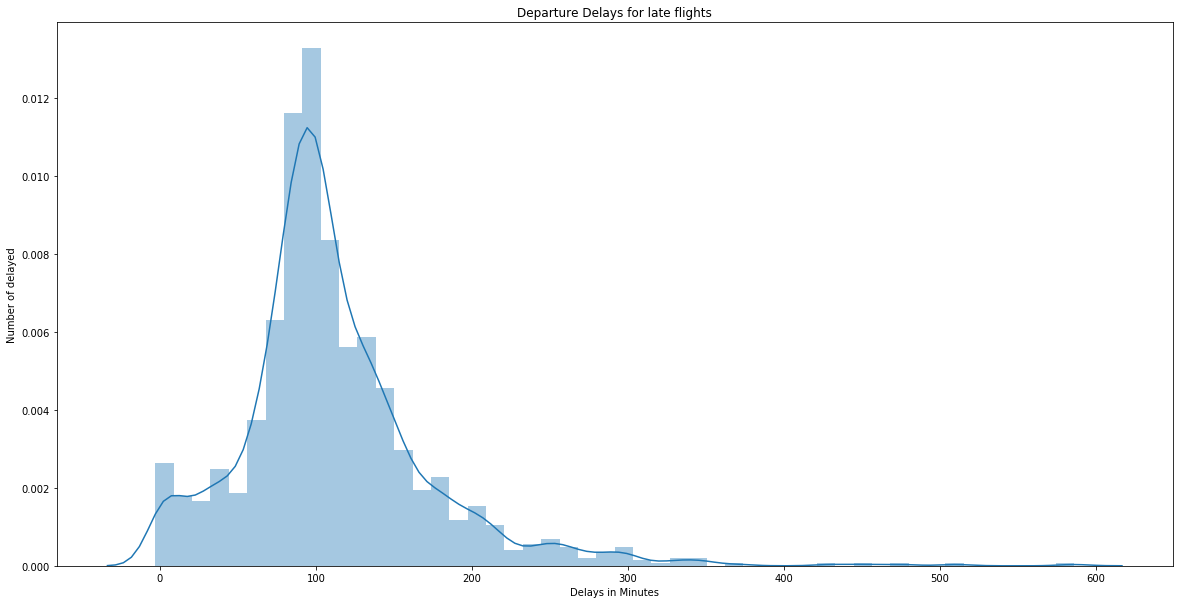

In [122]:
# I expect to see that the high outliers have all a departure delay

# Set a more bigger figure size
plt.figure(figsize = [20, 10])

# Plot the departure delays
depdelay_plot = sb.distplot(df_highlate['DepDelay'])

# Set labels names
depdelay_plot.set(title='Departure Delays for late flights', xlabel='Delays in Minutes', ylabel='Number of delayed');

Strange : some of those flights had a negative departure delays, meaning the flights started in advance

In [123]:
# The flights started in advance, but arrived late !
df_highlate.query('DepDelay < 0')

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,airport,timestamp
11861,1,706.0,707,921.0,754,Tway Air,355,135.0,47,87.0,-1.0,PBI,MCO,142.0,False,0,"Orlando, FL - International",1992-10-26
16418,4,1343.0,1345,1631.0,1445,US Airways,1109,168.0,60,106.0,-2.0,ROC,EWR,246.0,False,0,"Newark, NJ",1990-04-19
26078,5,703.0,704,932.0,809,Tway Air,523,149.0,65,83.0,-1.0,IND,STL,229.0,False,0,"Saint Louis, MO",1992-04-10
33975,1,859.0,900,1611.0,1446,American Airlines,88,312.0,226,85.0,-1.0,SAN,ORD,1723.0,False,0,"Chicago, IL - O'Hare",1990-03-05
34956,2,1255.0,1256,1550.0,1358,American Airlines,1365,235.0,122,112.0,-1.0,RDU,ORD,647.0,False,0,"Chicago, IL - O'Hare",1991-09-03
50991,1,625.0,627,1211.0,825,Ukraine Airlines,1698,346.0,118,226.0,-2.0,PSC,SFO,620.0,False,0,"San Francisco, CA",1988-02-08
51746,4,927.0,930,1215.0,1052,United Airlines,1704,168.0,82,83.0,-3.0,LAX,SFO,337.0,False,0,"San Francisco, CA",1990-04-19
65547,5,1816.0,1817,2143.0,1950,United Airlines,27,207.0,93,113.0,-1.0,BOS,IAD,413.0,False,0,Washington DC - Dulles,1992-07-10
70210,2,816.0,817,1128.0,929,United Airlines,593,192.0,72,119.0,-1.0,ORD,DSM,299.0,False,0,"Des Moines, IA",1992-12-29
71475,7,1614.0,1615,1921.0,1730,US Airways,769,187.0,75,111.0,-1.0,BWI,UCA,282.0,False,0,"Utica, NY",1990-09-16


This is not clear.  It might have someting to do with geography, cities positioning maybe. So let's move on to the relations with the cities.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1st variable : `Cancelled`  
This is a categorical variable with 2 states, True of False. The first relevant information here is the proportion of the cancelled flights versus the ones really performed. I saw very low 1.1% of cancelled flights, which indeed is still important in the flight industry.  

2nd variable : `Dest` as destination cities.   
The second information I found out visually is the destination city with the most cancelled flight : ORD for "Chicago-O´Hare".   
I also saw that US Airways is the carrier (`Uniquecarrier` variable) with the most cancelled flights.   

3rd variable : `ArrDelay`   
At the first plot, i found an histogram which is right skewed. I tried to find an appropriate bin width for the histogram visualization. Then I zoomed on the main bulk of the data through the use of axis limits.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

`Cancelled` : I converted the data type to boolean. It was int64 with 0 or 1. Boolean True or False was more easy to understand information, especially on the graph, but also for data exploration by code.  

Regarding `ArrDelay`: First, from the dataset, I removed all the rows related to cancelled flights. I did not perform any specific operations on the arrival delay data, which were alreay in minutes. 

## Bivariate Exploration

For cancelled flight, I am looking for the relationship between the carriers and the arrival cities. This is as further exploration regarding the arrival cities with the most cancelled flights.   
For simplification and more accurate analysis, I decide to focus on the top five and top seven destinations cities for cancelled flights identified during the univariate exploration.

In [124]:
# Create a dataframe for the top 5 and 7 cancelled destinations

# Create the dataframe
df_5_cancelled = df_cancelled.query('airport in @first_5_cities')
df_7_cancelled = df_cancelled.query('airport in @first_7_cities')

Now I visualize their relationships with the carriers.

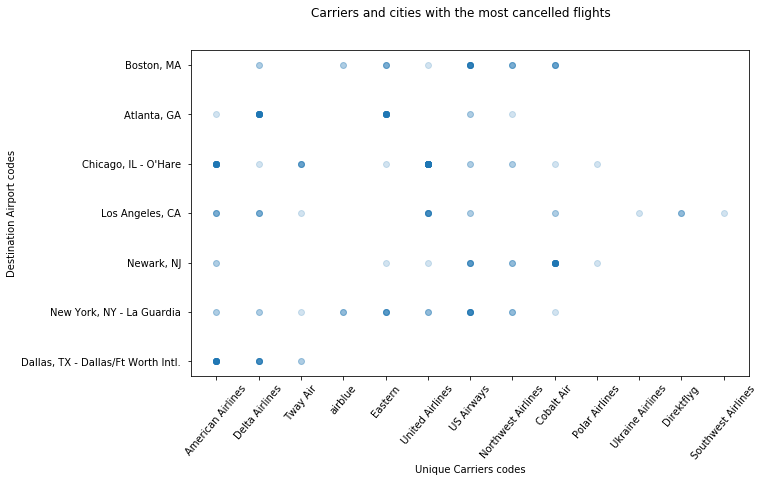

In [125]:
# Set the plot size
fig = plt.figure(figsize = [10, 6])

# use the jitter from reglot
plt.scatter(data = df_7_cancelled, x = 'UniqueCarrier', y='airport', alpha = 1/5)

# Set the title
fig.suptitle('Carriers and cities with the most cancelled flights', fontsize=12)

# set x and y labels
plt.xlabel('Unique Carriers codes')
plt.ylabel('Destination Airport codes')

# rotate labels on x axis
plt.xticks(rotation=50);

For ORD (Chicago) arrival airport, AA (American Airlines) and UA (United Airlines) are the carriers with the most cancelled flights.   
For BOS (Boston) arrival airport, US (US Airways) is the winner.   
For LGA (New York) arrival airport, US (US Airways) is also the one with the most cancelled flights.   
for ATL (Atlanta) arrival airport, EA (Easten Airlines) and DL (Delta Airlines) are the carriers with the most cancelled flights.  

I am also looking for the destinations which are home for more delays. So let's check the cities with the most occurences of delays.

In [126]:
# focus on the cities where ArrDelay > 0
df_delayed = df_completed_flights.query('ArrDelay > 0')

What are the top destination cities where we have the most delayed flights ?

In [127]:
# Get the first 20 top cities where we have the most delayed flights
delayed_topcities = df_delayed.airport.value_counts().head(20).keys().tolist()

In [128]:
# Create a dataframe for those cities
df_delayed_topcities = df_delayed.query('airport in @delayed_topcities')

As a bivariate exploration, let's find out which are the top 3 carriers associated with all the arrival cities with delayed flights.

I plot the relationships using a scatterplot. It seems the most simple way to assess the relationship I am looking for at this stage.   
As I have too many cities, for visualization clarity, I choose to not display the cities names along the y axis. 

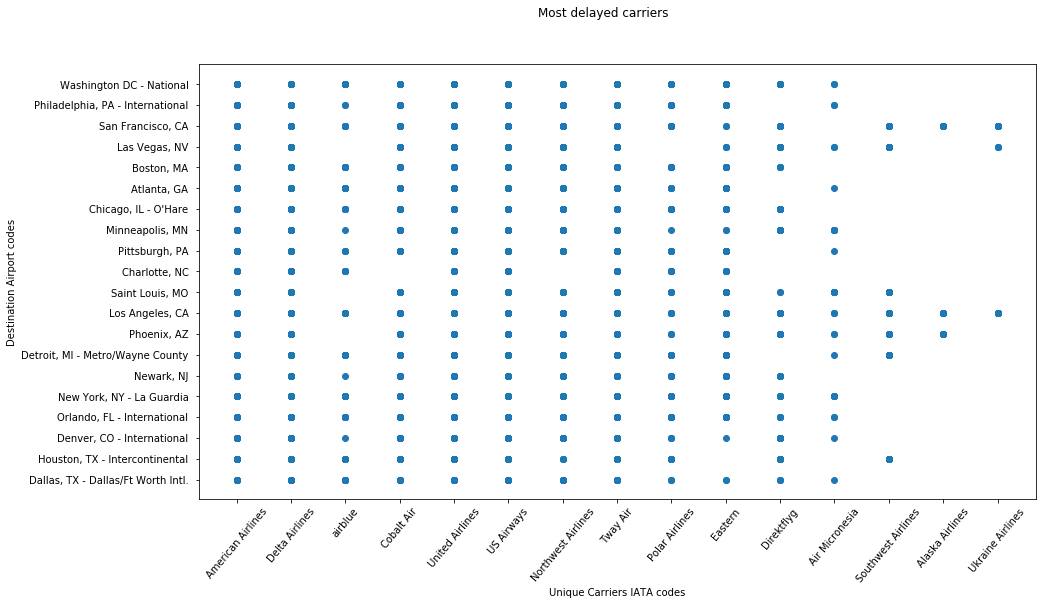

In [129]:
# Relationship between top 5 arrival cities for delays and carriers

# set the graph size
fig = plt.figure(figsize = [15, 8])

# scatterplot
plt.scatter(data = df_delayed_topcities, x = 'UniqueCarrier', y = 'airport')

# set x and y labels
plt.xlabel('Unique Carriers IATA codes')
plt.ylabel('Destination Airport codes')

# Set the plot title
fig.suptitle('Most delayed carriers', fontsize=12)

# rotate labels on x axis
plt.xticks(rotation=50);

For all the arrival cities with delays, here the top five careers which are the mostly late : AA (American Airlines), TW (Trans World Airlines), US (US Airways), DL (Delta Airlines), UA (United Airlines).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

First I observed the relationship between the carriers and the cities with the most cancelled flight. I found out that :   
- For ORD (Chicago) arrival airport, AA (American Airlines) and UA (United Airlines) are the carriers with the most cancelled flights.
- For BOS (Boston) arrival airport, US (US Airways) is the winner.
- For LGA (New York) arrival airport, US (US Airways) is also the one with the most cancelled flights.
- for ATL (Atlanta) arrival airport, EA (Easten Airlines) and DL (Delta Airlines) are the carriers with the most cancelled flights. 

Considering that these are not numeric variables, there is no variation between the features but just an accumulation of points each time we have an association.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, between the cities and the carriers, both for cancelled flights and delayed flights. For delayed flights, I've identified the top five careers which are the mostly late : AA (American Airlines), TW (Trans World Airlines), US (US Airways), DL (Delta Airlines), UA (United Airlines).

## Multivariate Exploration

To develop an understanding on cancelled flights, I observed relationship between cities and carriers. I did the same for insights regarding delayed flights.   
For the cancelled flights, let's add the planned flight duration `CSRElapsedTime` to explore further insights.  
For the delayed flights, I would like to explore the departure delay `DepDelay` in addition to the previous features. 

For airlines, distances (and consequently flights duration) are organized along short-haul, medium-haul and long-haul flights. I choose :
- short-haul flights : CSRElaspedTime <= 120 min
- medium-haul flights : 5h >= CSRElaspedTime > 120 min
- long-haul flights : CSRElaspedTime > 5h

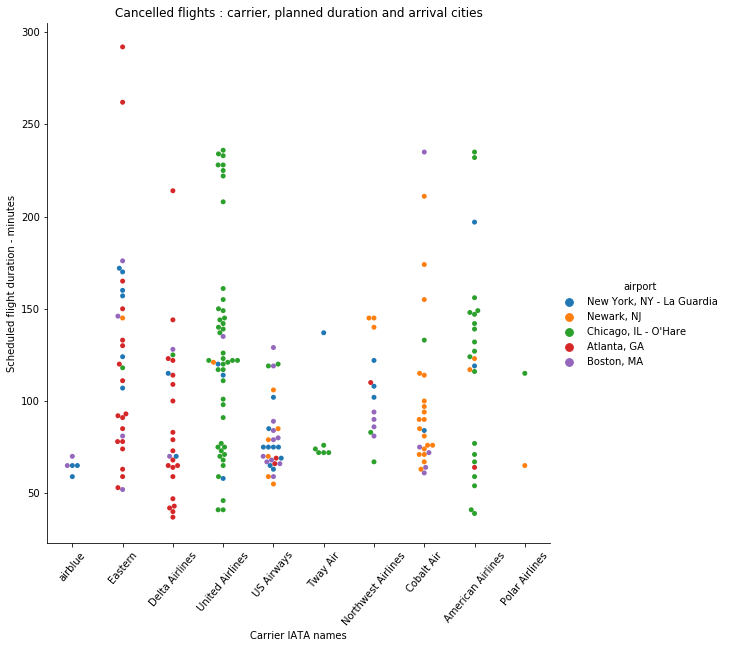

In [130]:
# plot the 3 variables : carrier (UniqueCarrier, scheduled flight duration(CRSElapsedTime) and destination (Dest)
myplot = sb.catplot(x="UniqueCarrier", y="CRSElapsedTime", kind="swarm", data=df_5_cancelled, hue='airport', height=8)

# Set the titles
myplot.set(title='Cancelled flights : carrier, planned duration and arrival cities', xlabel='Carrier IATA names', ylabel='Scheduled flight duration - minutes')

# rotate labels on x axis
myplot.set_xticklabels(rotation=50);

Here are the information I can see :   
- Eastern and Delta Airlines cancelled flights were mostly planned for to Atlanta. The majority of them were short and medium-haul flights.
- American Airlines and United Airlines cancelled flights were mostly planned for Chicago. Here we had short and medium-haul flights too.  

Let's do the same exploration for the delayed flights. But here, I include the departure delay `DepDelay` as a third feature.   
For readability, I focus on the top five cities where I saw the most delayed flights.

In [131]:
# Get the first 6 top cities where we have the most delayed flights
delayed_fivecities = df_delayed.airport.value_counts().head(6).keys().tolist()

In [132]:
# Create a dataframe for those cities
df_delayed_fivecities = df_delayed.query('airport in @delayed_fivecities')

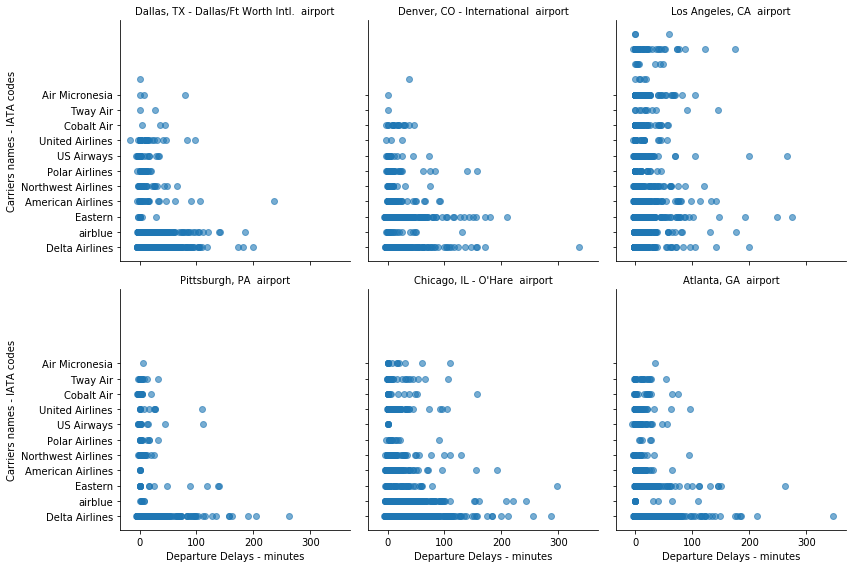

In [133]:
# plot the 3 variables : carrier (UniqueCarrier, departure delay (DeDelay) and destination (Dest)

# I use faceting by airport
deplayedplot = sb.FacetGrid(df_delayed_fivecities, col = 'airport', col_wrap = 3, size = 4)

# Each graph is a categorical for departure delays and carrier name
deplayedplot.map(plt.scatter, 'DepDelay', 'UniqueCarrier', alpha = 3/5)

# set the axis labels
deplayedplot.set_axis_labels("Departure Delays - minutes", "Carriers names - IATA codes");

# set each facet title with the airport name and "airport" keyword
deplayedplot.set_titles("{col_name} {col_var}");

I can see a confirmation regarding Atlanta and Chicago : most of the flights delayed on arrival for those airports, left their origin airports with a delay too.  
It is quite interesting to see that for mostly all the carriers, their flights heading to Los Angeles were delayed on departure. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Regarding the cancelled flights : 
- Eastern and Delta Airlines cancelled flights were mostly planned for to Atlanta. The majority of them were short and medium-haul flights.
- American Airlines and United Airlines cancelled flights were mostly planned for Chicago. Here we had short and medium-haul flights too.   
So I would say that the duration as a 3rd feature strengthened my conclusions. Indeed, Atlanta and Chicago are Hubs for most airlines. It make sense to have a high volume of short-haul and medium-haul flights to the Hubs.

Regarding the delayed flighs :
It seems normal to find out delays on departure, as we have delays on the arrival. The additional feature does not really strengthened the previous conclusions, but provided a precision for each carrier. 

### Were there any interesting or surprising interactions between features?

Yes. On the multivariate exploration for cancelled flights. Atlanta and Chicago are well know big airports which, I assume, are Hubs for some airlines. So are those cancellations related to airlines traffic management ? This would be an interested point to dive in.

In [135]:
# Generate the HTML version of this notebook
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration.ipynb'])

0